# Lab 3

## Read file
The file is readed in read-only mode.

In [1]:
%matplotlib inline
import sys, re, math
import matplotlib.pyplot as plt
infile = open('romeoandjuliet.txt', 'r')

## Create a dictionary

A dictionary is created to store all unique words. Continuous \w or ' are considered as words, but pattern with ' in both beginning or end like 'banished' are not matched.

In [2]:
wordsDict = {}
# continuous \w or ' are considered as words, but with ' in both
# beginning and the end are excluded
for line in infile:
    line = line.lower().rstrip()
    words = re.findall(r"([\w']+)", line)
    for word in words:
        if word[0] == "'" and word[-1] =="'":
            continue
        if word in wordsDict:
            wordsDict[word] += 1
        else:
            wordsDict[word] = 1
print("There is", len(wordsDict), "unique words in total.")

There is 3829 unique words in total.


## Plotting most and least frequent words
Because there are too many unique words in this text, it is not possible to plot the frequency of each word in a single graph.  
Thus only the 10 most frequently used words are plotted.

Some of the least frequent words:
jointure : 1
demand : 1
statue : 1
whiles : 1
figure : 1
sacrifices : 1
glooming : 1
pardon'd : 1
punished : 1


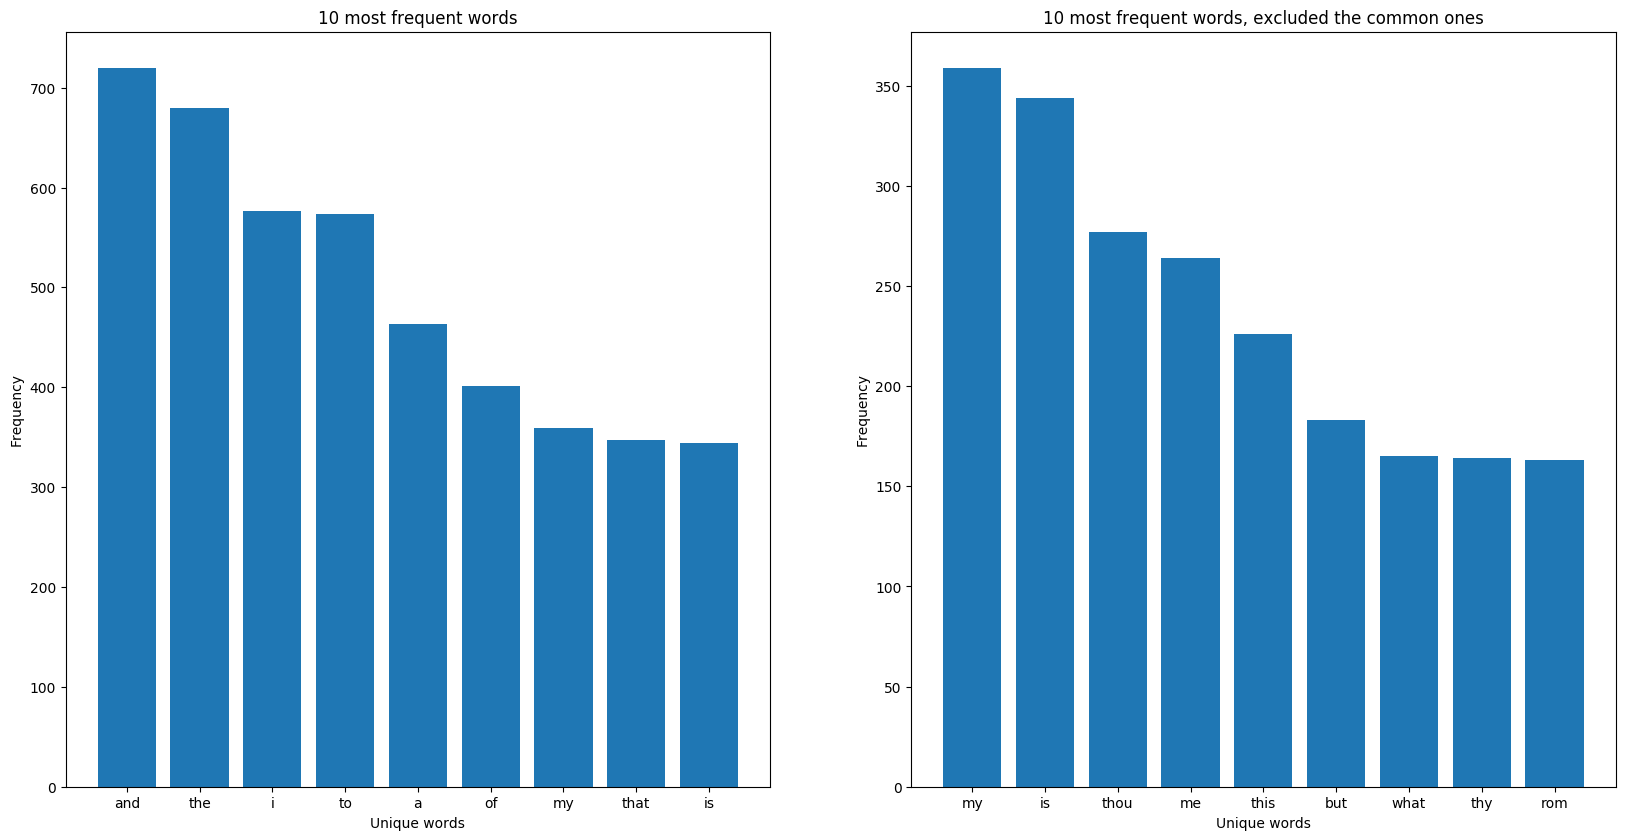

In [3]:
# sort keys of wordsDict according to the value(frequency)
sortedKey = sorted(wordsDict, key=wordsDict.get, reverse=True)
fig = plt.figure(figsize=(20,10), dpi=100)
plt.bar(sortedKey[:9], [wordsDict[word] for word in sortedKey[:9]], axes=fig.add_subplot(121))
plt.xlabel("Unique words"); plt.ylabel("Frequency")
plt.title("10 most frequent words")
# exclude 20 most common used words in English
mostFreq = ['the', 'be', 'to', 'of', 'and', 'a', 'in', 'that', 'have', 'i', 'it', 'for', 'not', 'on', 'with', 'he', 'as', 'you', 'do', 'at']
for word in mostFreq:
    sortedKey.remove(word)
plt.bar(sortedKey[:9], [wordsDict[word] for word in sortedKey[:9]], axes=fig.add_subplot(122))
plt.xlabel("Unique words"); plt.ylabel("Frequency")
plt.title("10 most frequent words, excluded the common ones")
# show some of the words used only once
print("Some of the least frequent words:")
for word in sortedKey[-10:-1]:
    print(word, ":", wordsDict[word])

"Thou" and "thy" used a lot. This text is somewhat ancient English.

## Bonus: plotting the frequency

In this section, I draw a bar plot of the frequency of the top 100 most frequently used words vs. their ranks. Then both x and y axes are drawn in log (among all unique words).

Text(0.5,1,'Words frequency, in log-log')

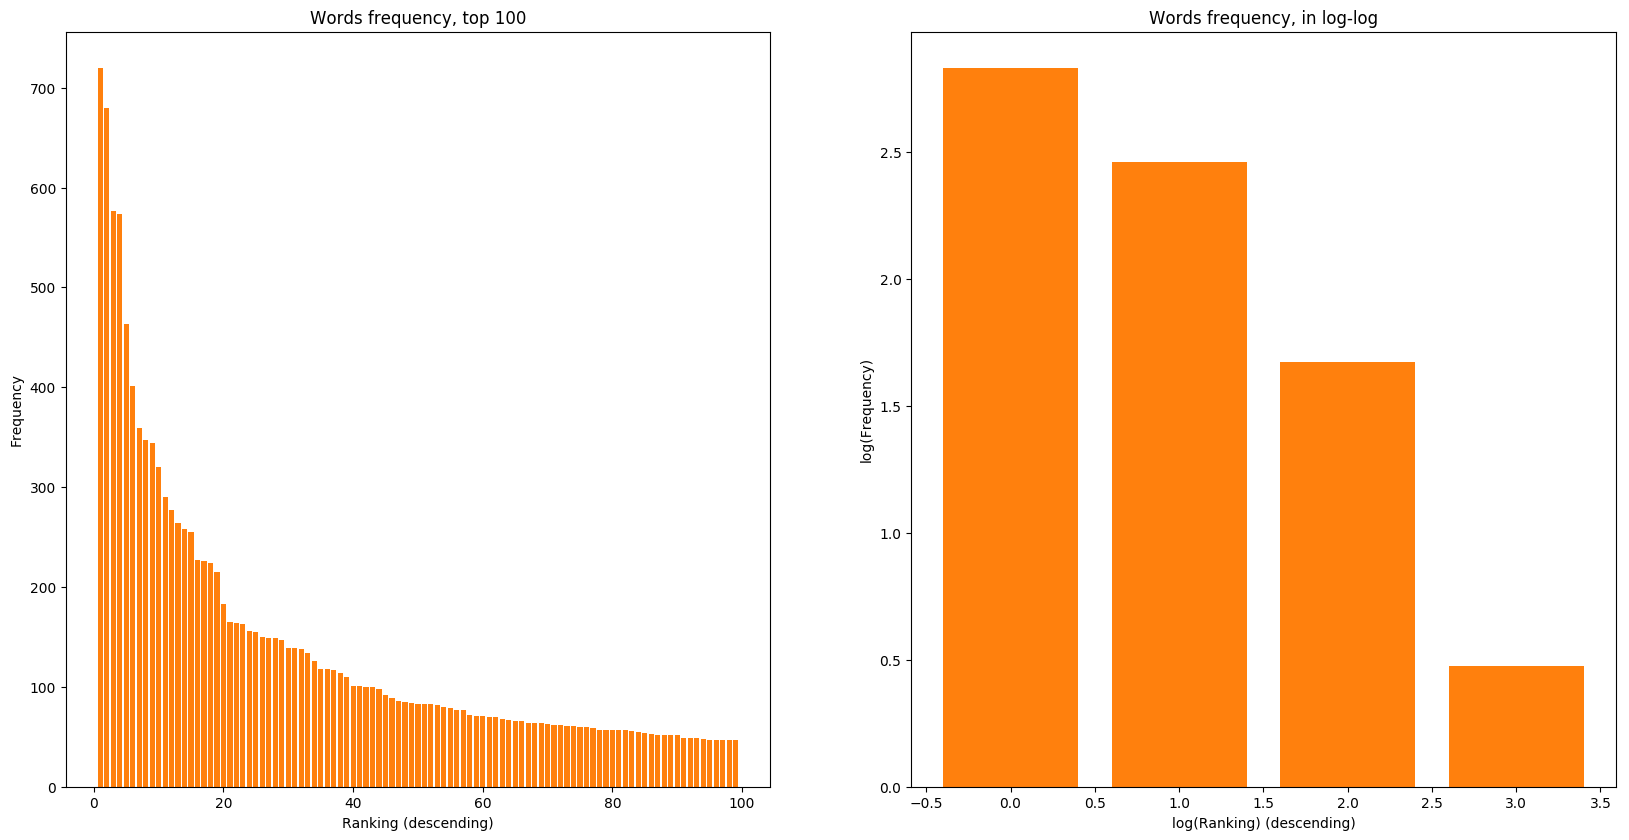

In [10]:
# sord dictionary according to its values
sortedDict = sorted(wordsDict.values(), reverse=True)
top = 100
fig = plt.figure(figsize=(20,10), dpi=100)
plt.bar(range(1,top), sortedDict[:top-1], axes=fig.add_subplot(121), color=(1.0,0.5,0.05,1.0))
plt.xlabel("Ranking (descending)"); plt.ylabel("Frequency")
plt.title("Words frequency, top " + str(top))
# plotting in log scale
logX = range(math.floor(math.log10(len(sortedDict)))+1)
plt.bar(logX, [math.log10(sortedDict[10**i]) for i in logX], axes=fig.add_subplot(122), color=(1.0,0.5,0.05,1.0))
plt.xlabel("log(Ranking) (descending)"); plt.ylabel("log(Frequency)")
plt.title("Words frequency, in log-log")

The former graph looks more exponential, and the latter one looks more linear.